## Simulazione II Esame di Metodi Numerici Soluzioni##

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12
                                                                                            
- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [26]:
from scipy.io import loadmat
import scipy.linalg as spl
import numpy as np
import matplotlib.pyplot as plt
from SolveTriangular import *

In [27]:
dati = loadmat('Test_I.mat')
A1 = dati["A1"]
b1 = dati["b1"]
A1=A1.astype(float)  #ATTENZIONE: è necessario fare il cast a float, A e b sono memorizzati nel file 
#come int e python fa i calcoli in int e ci sono rallentamenti nelle iterazioni
b1=b1.astype(float)

In [28]:
m,n=A1.shape
print("dimensioni dell matrice ",m,n)

dimensioni dell matrice  10 10


In [29]:
nz=np.count_nonzero(A1)/(n*m)
perc_nz=nz*100
print("Percentuale elementi diversi da zero ",perc_nz,"%")

Percentuale elementi diversi da zero  100.0 %


In [30]:
flag=A1==A1.T
if np.all(flag)==0:
    print("La matrice non è simmetrica")
else:
    print("La matrice è simmetrica")
    autovalori_pos=np.all(np.linalg.eigvals(A1))
    print("Matrice definita positiva ",np.all(np.linalg.eigvals(A1)>0))


La matrice è simmetrica
Matrice definita positiva  False


In [31]:
P,L,U = spl.lu(A1)
P=P.T
#Le permutazioni di righe fatte sulla matrice vengono effettuate anche sul termine noto
y,flag=Lsolve(L,P@b1)
x,flag=Usolve(U,y)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [32]:
bp=b1.copy()
bp[1]=bp[1]+0.001*bp[1]
yp,flag=Lsolve(L,P@bp)
xp,flag=Usolve(U,yp)
err_dati=np.linalg.norm(b1-bp,2)/np.linalg.norm(b1,2)
err_soluzione=np.linalg.norm(x-xp,2)/np.linalg.norm(x,2)
print("errore percentuale dati ",err_dati*100)
print("errore percentuale soluzione ",err_soluzione*100)
print("Condizionamento A1 ",np.linalg.cond(A1,2))

errore percentuale dati  0.02484464675963486
errore percentuale soluzione  1.6171130615839198
Condizionamento A1  120.6148722322323


In [33]:
A2 = dati["A2"]
b2 = dati["b2"]
A2=A2.astype(float)  #ATTENZIONE: è necessario fare il cast a float, A e b sono memorizzati nel file 
#come int e python fa i calcoli in int e ci sono rallentamenti nelle iterazioni
b2=b2.astype(float)

In [34]:
m,n=A2.shape
print("dimensioni dell matrice ",m,n)

dimensioni dell matrice  25 10


In [35]:
condA2=np.linalg.cond(A2,2)
print("cond A2 ",condA2)
import scipy

cond A2  10000.00000000046


In [36]:
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=scipy.linalg.qr(A)
    h=Q.T@b
    x,flag=Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo
    

In [37]:
x2,residuo=qrLS(A2,b2)
print(x2)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [38]:

A3 = dati["A3"]
b3 = dati["b3"]
A3=A3.astype(float)  #ATTENZIONE: è necessario fare il cast a float, A e b sono memorizzati nel file 
#come int e python fa i calcoli in int e ci sono rallentamenti nelle iterazioni
b3=b3.astype(float)

dimensioni dell matrice  225 225


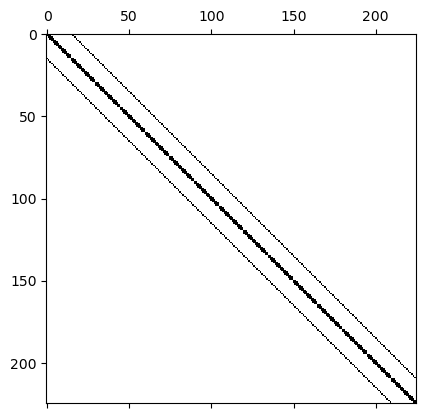

In [39]:
m,n=A3.shape
print("dimensioni dell matrice ",m,n)
plt.spy(A3)

In [40]:
flag=A3==A3.T
if np.all(flag)==0:
    print("La matrice non è simmetrica")
else:
    print("La matrice è simmetrica")
    autovalori_pos=np.all(np.linalg.eigvals(A3)>0)
    print("Matrice definita positiva ",autovalori_pos)
    
print("Condizionamento di A ",np.linalg.cond(A3))

La matrice è simmetrica
Matrice definita positiva  True
Condizionamento di A  103.08686891981725


In [41]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p  #aggiornamento della soluzione nella direzione opposta a quella del gradiente: alpha mi dice dove fermarmi 
        #nella direzione del gradiente affinche F(xk+t p ) <F(xk)
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r #Direzione opposta alla direzione del gradiente
        
     
    return x,vet_r,vec_sol,it


def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A.dot(x)-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A.dot(p)
        alpha = -(r.T@p)/(p.T@Ap)
        x = x + alpha *p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
    
    return x,vet_r,vec_sol,it


iterazioni SD 1212
iterazioni CG 31
Condizionamento di A3 103.08686891981725


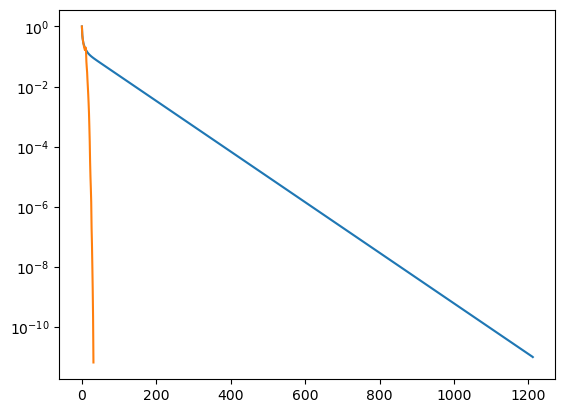

In [43]:
x0 = np.zeros_like(b3)
itmax = 1500
toll = 1e-11
xSD,vet_rSD,vec_solSD,itSD=steepestdescent(A3,b3,x0,itmax,toll)
xCG,vet_rCG,vec_solCG,itCG=conjugate_gradient(A3,b3,x0,itmax,toll)
print('iterazioni SD', itSD)
print('iterazioni CG', itCG)
print("Condizionamento di A3",np.linalg.cond(A3,2))
plt.semilogy(np.arange(itSD+1),vet_rSD,np.arange(itCG+1),vet_rCG)

## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
k=np.linspace(6.0,16.0,11)
a=1
b=2**(2*k)-3**(-2*k)
c=-2**(2*k)*3**(-2*k)

x1_true=-2**(2*k)
x2_true=3**(-2*k)
Delta=b**2-4*a*c
x1=(-b-np.sqrt(Delta))/2
x2=(-b+np.sqrt(Delta))/2


- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [ ]:
err_x1=np.abs(x1-x1_true)/np.abs(x1_true)
err_x2=np.abs(x2-x2_true)/np.abs(x2_true)


- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

In [ ]:

plt.plot(np.linspace(6,16,11),err_x1,'o-',np.linspace(6,16,11),err_x2,'*--')
plt.legend(['err_x1','err_x2'])

- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

In [ ]:

print("b=",b)
print("c=",c)
Delta=b**2-4*a*c
print('Spacing',np.spacing(b**2))
print("4*a*c",4*a*c)
print("B**2",b**2)
print("4*a*c",4*a*c)

- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]

In [ ]:
x2_new=c/(a*x1)
err_x2_new=np.abs(x2_new-x2_true)/np.abs(x2_true)
plt.plot(np.linspace(6,16,11),err_x2_new)
plt.legend(['err_x2_new'])